In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 4.9 MB/s eta 0:00:00


In [3]:
# # Authenticate and initialize GEE
# import ee
# import wxee
# import xarray as xr
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize GEE with service account
# service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
# key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'
# credentials = ee.ServiceAccountCredentials(service_account, key_file)
# ee.Initialize(credentials)
# # wxee.Initialize()

# # Cities with (lat, lon)
# cities = {
#     "Austin": (30.2672, -97.7431),
#     "New York": (40.7128, -74.0060),
#     "Los Angeles": (34.0522, -118.2437),
#     "Chicago": (41.8781, -87.6298),
#     "Houston": (29.7604, -95.3698),
#     "Phoenix": (33.4484, -112.0740),
#     "Philadelphia": (39.9526, -75.1652),
#     "San Antonio": (29.4241, -98.4936),
#     "San Diego": (32.7157, -117.1611),
#     "Dallas": (32.7767, -96.7970),
#     "San Jose": (37.3382, -121.8863),
#     "Detroit": (42.3314, -83.0458),
#     "Seattle": (47.6062, -122.3321),
#     "Miami": (25.7617, -80.1918),
#     "Denver": (39.7392, -104.9903),
#     "Boston": (42.3601, -71.0589)
# }

# # Date range (you can loop over years to compute a full weekly climatology)
# start_date = '2024-01-01'
# end_date = '2024-12-31'

# # Function to extract weekly climatology for one city
# def extract_pblh_climatology(lat, lon, buffer_km=25):
#     point = ee.Geometry.Point([lon, lat]).buffer(buffer_km * 1000)
#     collection = ee.ImageCollection('NASA/GSFC/MERRA/flx/2') \
#                     .filterDate(start_date, end_date) \
#                     .select('PBLH')

#     ds = collection.wx.to_xarray(region=point.bounds(), scale=69375)
#     if 'time' not in ds.dims:
#         return None

#     ds = ds.mean(dim=["x", "y"])  # spatial average over buffered area
#     df = ds.to_dataframe().reset_index()
#     df['dayofweek'] = pd.to_datetime(df['time']).dt.dayofweek
#     weekly_clim = df.groupby('dayofweek')['PBLH'].mean()
#     return weekly_clim

# # Collect climatology for each city
# weekly_pblh_by_city = {}

# for city, (lat, lon) in cities.items():
#     print(f"Processing {city}...")
#     try:
#         clim = extract_pblh_climatology(lat, lon)
#         if clim is not None:
#             weekly_pblh_by_city[city] = clim
#     except Exception as e:
#         print(f"Failed for {city}: {e}")

# # Convert to DataFrame for easy plotting
# weekly_df = pd.DataFrame(weekly_pblh_by_city)
# weekly_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# # Plot example
# plt.figure(figsize=(14, 6))
# for city in weekly_df.columns:
#     plt.plot(weekly_df.index, weekly_df[city], label=city)
# plt.title("Weekly Climatology of PBL Height (MERRA-2)")
# plt.xlabel("Day of Week")
# plt.ylabel("PBLH (m)")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.grid(True)
# plt.show()

Processing Austin...
Processing New York...
Processing Los Angeles...
Processing Chicago...
Processing Houston...
Processing Phoenix...
Processing Philadelphia...
Processing San Antonio...
Processing San Diego...
Processing Dallas...
Processing San Jose...
Processing Detroit...
Processing Seattle...
Processing Miami...
Processing Denver...
Processing Boston...


<ipython-input-5-5decfca8fb69>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(weekly_df.columns))


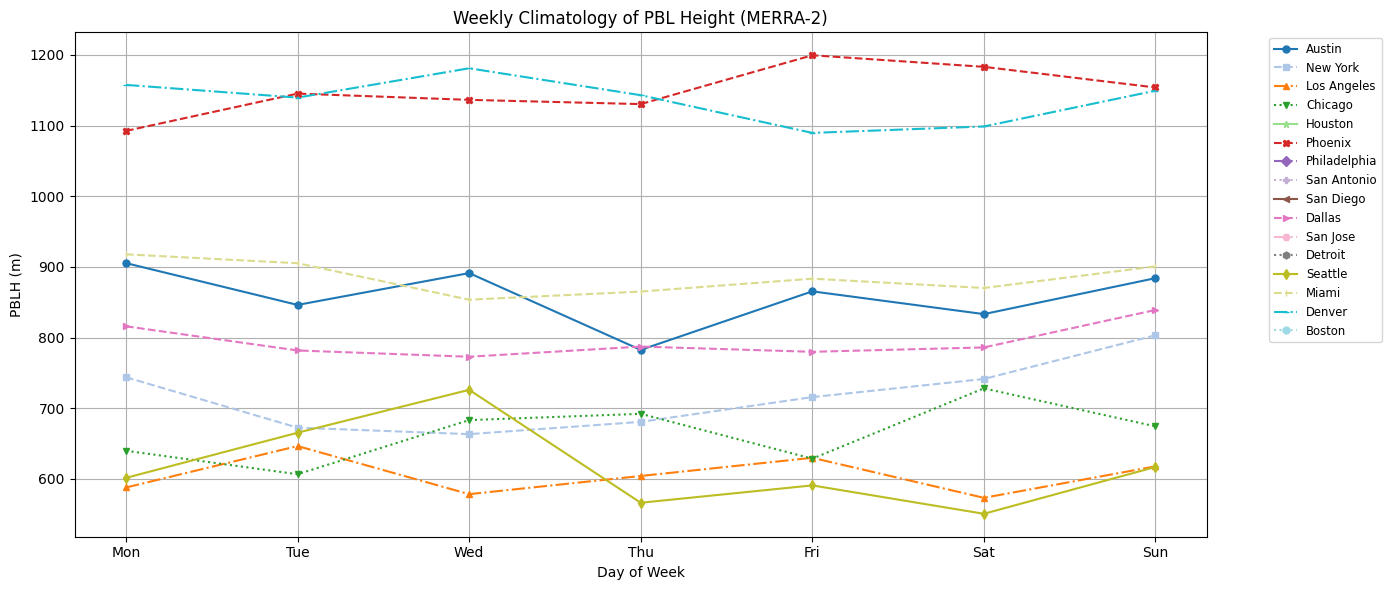

In [5]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Initialize Earth Engine
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

# City coordinates
cities = {
    "Austin": (30.2672, -97.7431),
    "New York": (40.7128, -74.0060),
    "Los Angeles": (34.0522, -118.2437),
    "Chicago": (41.8781, -87.6298),
    "Houston": (29.7604, -95.3698),
    "Phoenix": (33.4484, -112.0740),
    "Philadelphia": (39.9526, -75.1652),
    "San Antonio": (29.4241, -98.4936),
    "San Diego": (32.7157, -117.1611),
    "Dallas": (32.7767, -96.7970),
    "San Jose": (37.3382, -121.8863),
    "Detroit": (42.3314, -83.0458),
    "Seattle": (47.6062, -122.3321),
    "Miami": (25.7617, -80.1918),
    "Denver": (39.7392, -104.9903),
    "Boston": (42.3601, -71.0589)
}

start_date = '2024-01-01'
end_date = '2024-12-31'

# Function to extract data directly using getRegion
def extract_pblh_df(lat, lon, buffer_km=25):
    point = ee.Geometry.Point([lon, lat]).buffer(buffer_km * 1000)
    collection = ee.ImageCollection('NASA/GSFC/MERRA/flx/2') \
                    .filterDate(start_date, end_date) \
                    .select('PBLH') \
                    .map(lambda img: img.set('system:time_start', img.date().millis()))

    # Sample region at low resolution (large scale = low res)
    region = point.bounds()
    scale = 69375

    # Convert to feature collection of values
    data = collection.getRegion(region, scale).getInfo()

    # Parse data to DataFrame
    header = data[0]
    rows = data[1:]
    df = pd.DataFrame(rows, columns=header)
    df = df[['time', 'PBLH']].dropna()
    df['time'] = pd.to_datetime(df['time'], unit='ms')
    df['PBLH'] = pd.to_numeric(df['PBLH'], errors='coerce')
    df = df.dropna()
    df['dayofweek'] = df['time'].dt.dayofweek
    weekly_mean = df.groupby('dayofweek')['PBLH'].mean()
    return weekly_mean

# Run for each city
weekly_pblh_by_city = {}
for city, (lat, lon) in cities.items():
    print(f"Processing {city}...")
    try:
        weekly_pblh_by_city[city] = extract_pblh_df(lat, lon)
    except Exception as e:
        print(f"Failed for {city}: {e}")

# Assemble into DataFrame
weekly_df = pd.DataFrame(weekly_pblh_by_city)
weekly_df.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Enhanced plot with unique colors, line styles, and markers
colors = cm.get_cmap('tab20', len(weekly_df.columns))
markers = ['o', 's', '^', 'v', '*', 'X', 'D', 'P', '<', '>', 'H', 'h', 'd', '|', '_']
line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(14, 6))
for idx, city in enumerate(weekly_df.columns):
    color = colors(idx)
    marker = markers[idx % len(markers)]
    linestyle = line_styles[idx % len(line_styles)]
    plt.plot(
        weekly_df.index,
        weekly_df[city],
        label=city,
        color=color,
        linestyle=linestyle,
        marker=marker,
        markersize=5
    )

plt.title("Weekly Climatology of PBL Height (MERRA-2)")
plt.xlabel("Day of Week")
plt.ylabel("PBLH (m)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()

100%|██████████| 16/16 [00:33<00:00,  2.11s/it]
<ipython-input-7-6dcebf8b4438>:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(diurnal_df.columns))


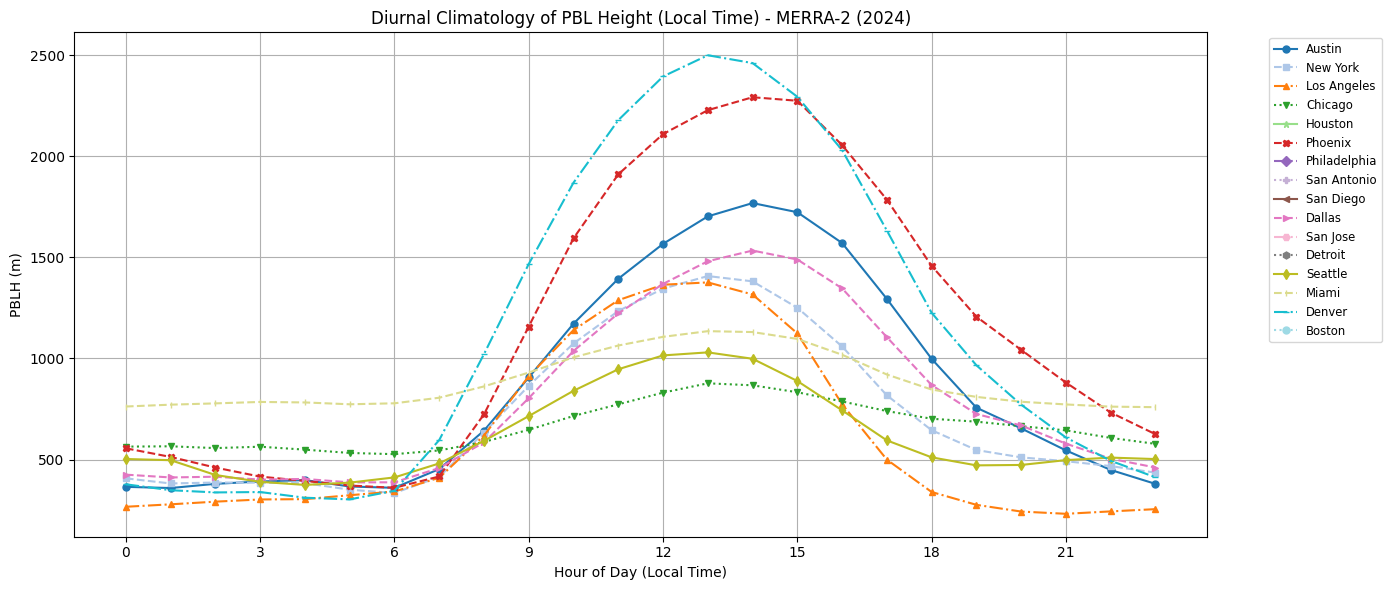

In [7]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tqdm import tqdm

# Initialize Earth Engine
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

# City coordinates
cities = {
    "Austin": (30.2672, -97.7431),
    "New York": (40.7128, -74.0060),
    "Los Angeles": (34.0522, -118.2437),
    "Chicago": (41.8781, -87.6298),
    "Houston": (29.7604, -95.3698),
    "Phoenix": (33.4484, -112.0740),
    "Philadelphia": (39.9526, -75.1652),
    "San Antonio": (29.4241, -98.4936),
    "San Diego": (32.7157, -117.1611),
    "Dallas": (32.7767, -96.7970),
    "San Jose": (37.3382, -121.8863),
    "Detroit": (42.3314, -83.0458),
    "Seattle": (47.6062, -122.3321),
    "Miami": (25.7617, -80.1918),
    "Denver": (39.7392, -104.9903),
    "Boston": (42.3601, -71.0589)
}

# UTC offset for each city (no DST)
utc_offset_hours = {
    'New York': -5, 'Boston': -5, 'Philadelphia': -5, 'Miami': -5, 'Detroit': -5,
    'Chicago': -6, 'Houston': -6, 'Dallas': -6, 'San Antonio': -6, 'Austin': -6,
    'Denver': -7, 'Phoenix': -7,
    'Los Angeles': -8, 'San Diego': -8, 'San Jose': -8, 'Seattle': -8
}

start_date = '2024-01-01'
end_date = '2024-12-31'

def extract_diurnal_pblh(lat, lon, utc_offset, buffer_km=25):
    point = ee.Geometry.Point([lon, lat]).buffer(buffer_km * 1000)
    collection = ee.ImageCollection('NASA/GSFC/MERRA/flx/2') \
        .filterDate(start_date, end_date) \
        .select('PBLH') \
        .map(lambda img: img.set('system:time_start', img.date().millis()))

    region = point.bounds()
    scale = 69375

    # Pull data from Earth Engine
    data = collection.getRegion(region, scale).getInfo()
    header = data[0]
    rows = data[1:]
    df = pd.DataFrame(rows, columns=header)
    df = df[['time', 'PBLH']].dropna()
    df['time'] = pd.to_datetime(df['time'], unit='ms', utc=True)
    df['PBLH'] = pd.to_numeric(df['PBLH'], errors='coerce')
    df = df.dropna()
    df['hour_utc'] = df['time'].dt.hour
    df['hour_local'] = (df['hour_utc'] + utc_offset) % 24
    diurnal = df.groupby('hour_local')['PBLH'].mean().sort_index()
    return diurnal

# Extract and store for each city
diurnal_data = {}
for city, (lat, lon) in tqdm(cities.items()):
    try:
        offset = utc_offset_hours[city]
        diurnal_data[city] = extract_diurnal_pblh(lat, lon, offset)
    except Exception as e:
        print(f"Failed for {city}: {e}")

# Create DataFrame
diurnal_df = pd.DataFrame(diurnal_data)

# Plot
plt.figure(figsize=(14, 6))
colors = cm.get_cmap('tab20', len(diurnal_df.columns))
markers = ['o', 's', '^', 'v', '*', 'X', 'D', 'P', '<', '>', 'H', 'h', 'd', '|', '_']
line_styles = ['-', '--', '-.', ':']

for idx, city in enumerate(diurnal_df.columns):
    plt.plot(
        diurnal_df.index,
        diurnal_df[city],
        label=city,
        color=colors(idx),
        linestyle=line_styles[idx % len(line_styles)],
        marker=markers[idx % len(markers)],
        markersize=5
    )

plt.title('Diurnal Climatology of PBL Height (Local Time) - MERRA-2 (2024)')
plt.xlabel('Hour of Day (Local Time)')
plt.ylabel('PBLH (m)')
plt.xticks(range(0, 24, 3))
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()